# Generate quadratures

In [29]:
import sys
import numpy as np
import os  
# Insert the path of modules folder 
sys.path.insert(0, "src/")
import gen_quad_sample
import quantum_states as qs

# Create a folder for the data
data_folder = 'state-tomography-data'
if not os.path.exists(data_folder):
    os.makedirs(data_folder)
elif not os.path.exists(data_folder):
    os.makedirs(data_folder)
# Hilbert space dimension
h_dim = 3
# Quadrature to measure 
quads_to_measure = np.linspace(0,np.pi,8)
# Number of points for each quadrature
ns = 1000
# Number of processor cores:
n_cpu = 8
# The input state is superposition of vacuum and single photon 
state = qs.FockState(n=[0.5,0.5,0],N=h_dim)
rho_in = state.get_rho()

gen_quad_sample.parrallel_gen_quad(rho = rho_in, quads=quads_to_measure, size_cpu=n_cpu, path=data_folder, ns=ns, xmin=-4, xmax=4)
#np.save(f'Data/state-a-{alpha:.2f}-phi-{phi:.2f}/rho', rho_in)

# Perform tomography

In [20]:
! python src/state_tomography.py -path state-tomography-data 

rho= [[ 5.07055668e-01-2.97209792e-12j  4.98939087e-01-6.21142298e-03j
  -1.09790071e-02+2.90588388e-02j  1.75857733e-03+1.83729231e-03j]
 [ 4.98939087e-01+6.21142297e-03j  4.91028521e-01-2.82717917e-12j
  -1.11592333e-02+2.84591933e-02j  1.70792050e-03+1.82942481e-03j]
 [-1.09790071e-02-2.90588388e-02j -1.11592333e-02-2.84591933e-02j
   1.90305478e-03+2.32084361e-12j  6.72157897e-05-1.40564169e-04j]
 [ 1.75857733e-03-1.83729231e-03j  1.70792050e-03-1.82942481e-03j
   6.72157952e-05+1.40564171e-04j  1.27564673e-05+3.47843348e-12j]]
Reconstructed density matrix is saved as reconstructed-density-matrix.npy


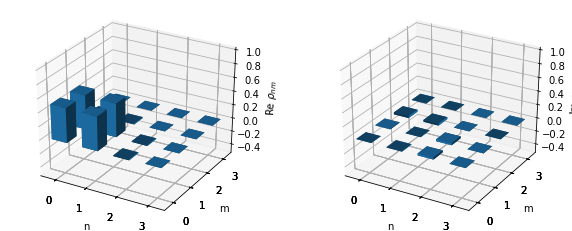

In [27]:
import numpy as np
import sys
sys.path.insert(0, "src/")
import barplot as bp
rho = np.load('reconstructed-density-matrix.npy')

bp.bar_plot(rho = rho, name=f'reconstructed-density-matrix', plot_img_part = True, label = "$\\rho_{nm}$")

# Original density matrix
For comparision we may present the original tensor

In [ ]:
bp.bar_plot(rho = rho_in, name=f'original-density-matrix', plot_img_part = True, label = "$\\rho_{nm}$")